In [170]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np 

In [171]:
store = pd.read_csv('stores.csv')
feature = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [172]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [174]:
data1 = store.merge(feature, how = 'inner', on = 'Store')
data1.head()             

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [175]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [176]:
data=data1.merge(train,how='inner',on=['Store','Date','IsHoliday'])
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [177]:
 data['Date'] = pd.to_datetime(data['Date'])
    

In [178]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day']=data['Date'].dt.day
data['Week']=data['Date'].dt.week

<ipython-input-178-74ba8d24ccc0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week']=data['Date'].dt.week


In [179]:
data['MarkDown1'].fillna(0, inplace = True)
data['MarkDown2'].fillna(0, inplace = True)
data['MarkDown3'].fillna(0, inplace = True)
data['MarkDown4'].fillna(0, inplace = True)
data['MarkDown5'].fillna(0, inplace = True)

In [180]:
data.sort_values(by=['Store','Dept'],ascending=True).reset_index(drop=True)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Month,Year,Day,Week
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,24924.50,2,2010,5,5
1,1,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,1,46039.49,2,2010,12,6
2,1,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,1,41595.55,2,2010,19,7
3,1,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,1,19403.54,2,2010,26,8
4,1,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,1,21827.90,3,2010,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,2012-09-28,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,98,508.37,9,2012,28,39
421566,45,B,118221,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,98,628.10,10,2012,5,40
421567,45,B,118221,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,98,1061.02,10,2012,12,41
421568,45,B,118221,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,98,760.01,10,2012,19,42


In [181]:
data_1= data[['Date','Weekly_Sales']]

In [182]:
df=data_1.groupby('Date').mean()['Weekly_Sales'].reset_index()

In [183]:
df.set_index('Date',inplace=True)

In [184]:
df

,Weekly_Sales
Date,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727
...,...
2012-09-28,14765.327279
2012-10-05,15983.413747
2012-10-12,15427.596739


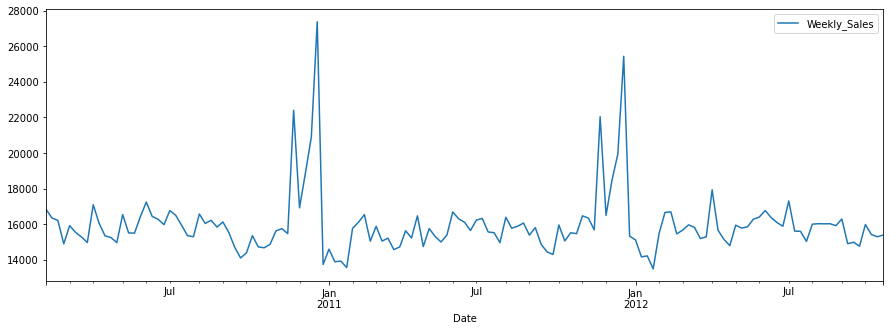

In [185]:
df.plot(figsize=(15,5))
plt.show()

In [186]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

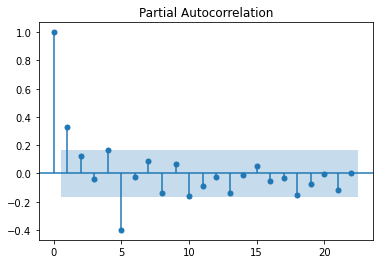

In [187]:
plot_pacf(df);

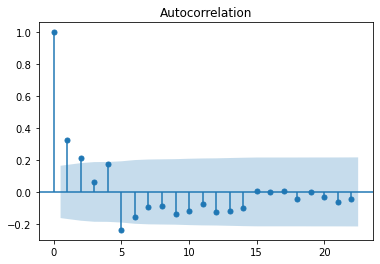

In [188]:
plot_acf(df);

In [189]:
ad_fuller_result = adfuller(df['Weekly_Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.930802744748687
p-value: 2.3832272706105506e-07


In [190]:
from pylab import rcParams
import statsmodels.api as sm

In [191]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

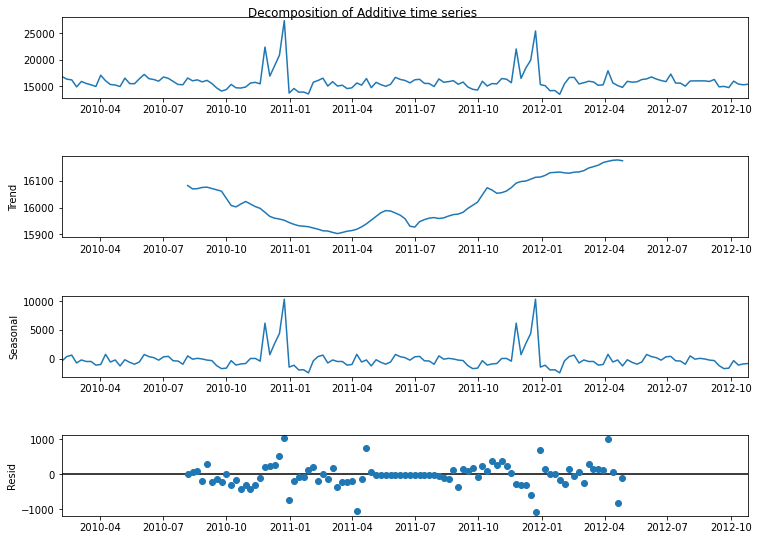

In [192]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Additive time series')
plt.show()

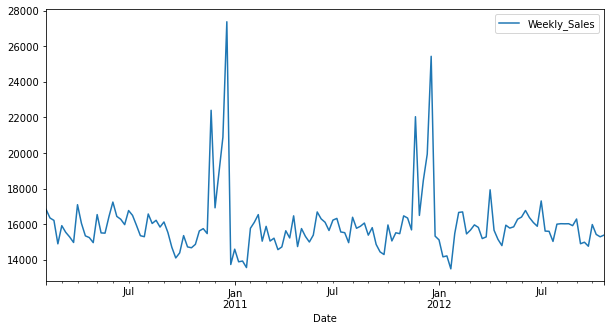

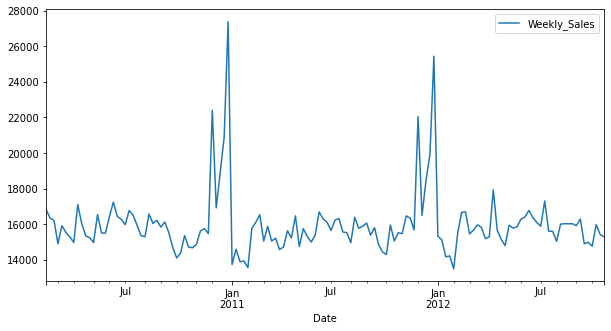

In [193]:
data_diff = df - df.diff(1)
data_diff=data_diff.dropna()
df.plot(figsize = (10,5))
data_diff.plot(figsize=(10,5))
plt.show()

In [194]:
ad_fuller_result = adfuller(data_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.912675440811385
p-value: 2.616403719543835e-07


<AxesSubplot:xlabel='Date'>

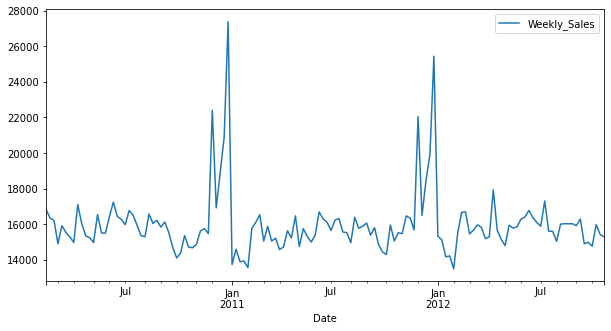

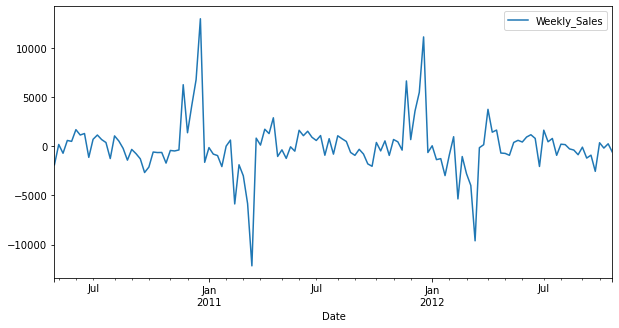

In [195]:
data_diff_1 = df - df.shift(12)
data_diff_1=data_diff_1.dropna()
data_diff.plot(figsize=(10,5))
data_diff_1.plot(figsize=(10,5))

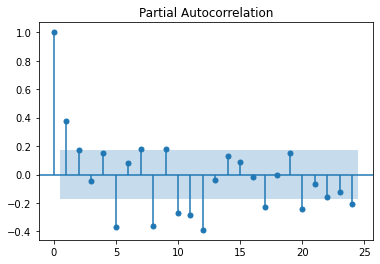

In [196]:
plot_pacf(data_diff_1,lags=24);


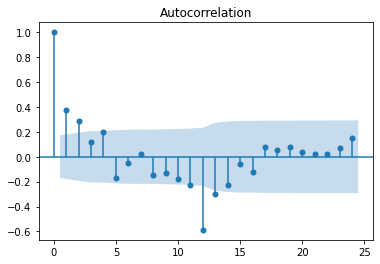

In [197]:
plot_acf(data_diff_1,lags=24);

In [198]:
data_diff_1


,Weekly_Sales
Date,
2010-04-30,-1868.612849
2010-05-07,190.660039
2010-05-14,-703.284509
2010-05-21,600.315671
2010-05-28,507.433726
...,...
2012-09-28,-2544.035058
2012-10-05,366.973333
2012-10-12,-175.229633


In [199]:
# Create Training and Test
train = data_diff_1[:105]
test = data_diff_1[105:]

In [200]:
from tqdm import tqdm_notebook 
def optimize_SARIMA(parameters_list, d, D, s, data):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [201]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12

parameters = list(itertools.product(p, q, P, Q))
parameters_list = list(parameters)
print(len(parameters_list))

256


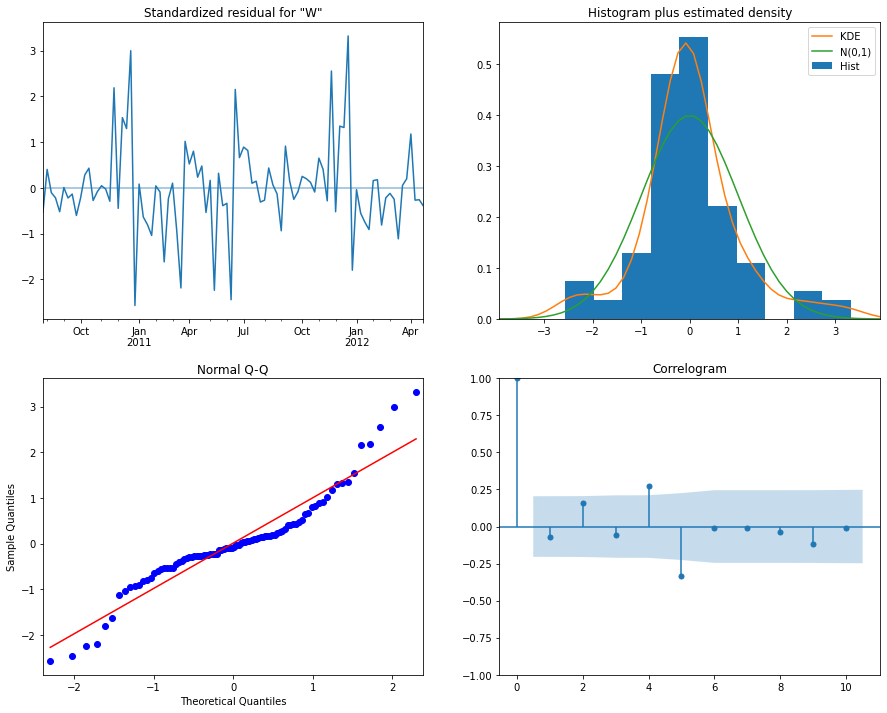

In [204]:
best_model.plot_diagnostics(figsize=(15,12));

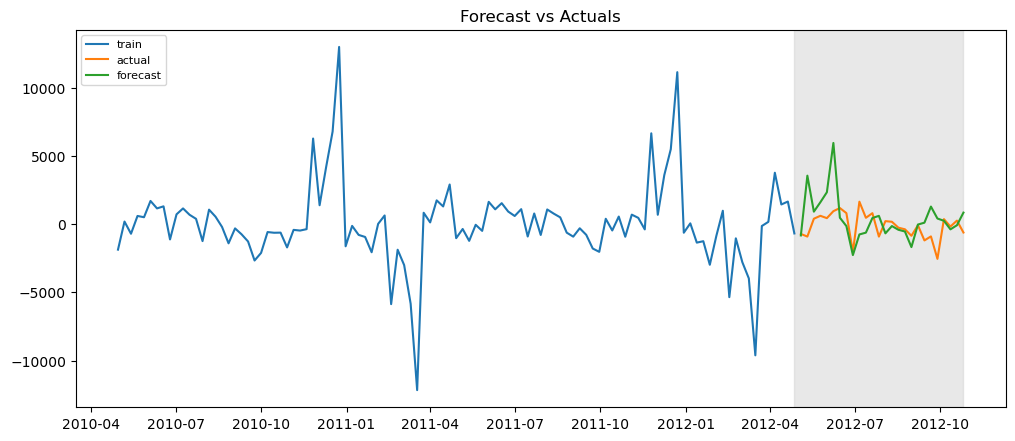

In [205]:
fc = best_model.forecast(26, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test.index)



plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.axvspan(train.index[-1], fc.index[-1], alpha=0.5, color='lightgrey')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

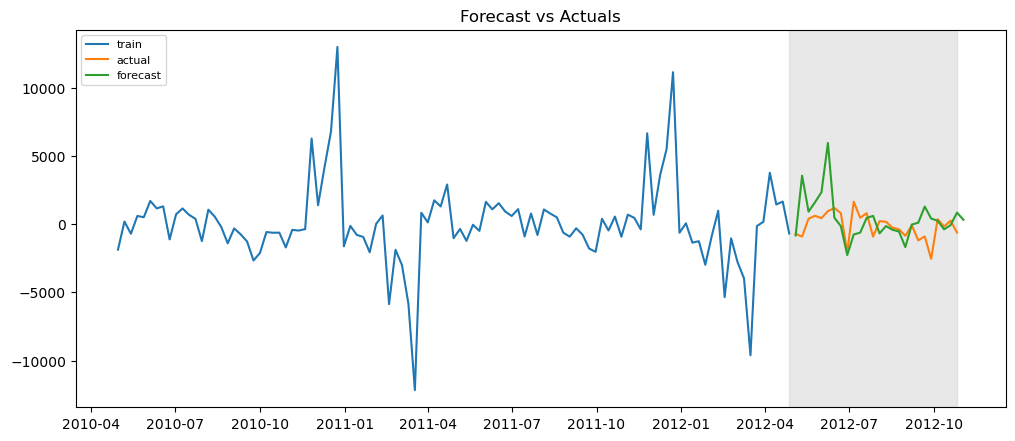

In [206]:
forecast = best_model.predict(start=train.shape[0], end=train.shape[0] + 26, return_conf_int=True) # 95% conf


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
plt.axvspan(train.index[-1], fc.index[-1], alpha=0.5, color='lightgrey')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [146]:
true = np.array(fc)
pred =  test.values.flatten()
def RMSPE(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100
RMSPE (true, pred)

342.1214938973293

In [41]:
train


,Weekly_Sales
Date,
2010-04-30,-1868.612849
2010-05-07,190.660039
2010-05-14,-703.284509
2010-05-21,600.315671
2010-05-28,507.433726
...,...
2012-03-30,168.488636
2012-04-06,3767.474643
2012-04-13,1441.814047


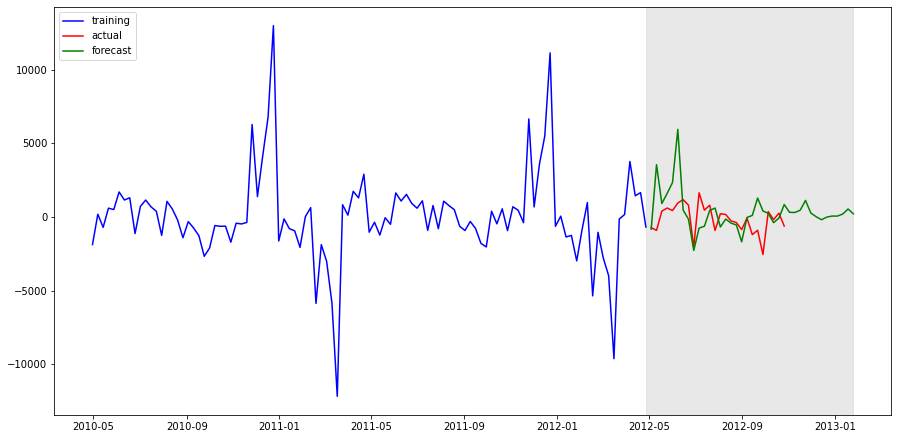

In [212]:
# train['sarima_model'] = best_model.fittedvalues
# train['sarima_model'][:38+1] = np.NaN

forecast = best_model.predict(start=train.shape[0], end=train.shape[0] + 38)
# forecast = train['sarima_model'].append(forecast)

plt.figure(figsize=(15, 7.5))
# plt.plot(forecast, color='r', label='model')
plt.axvspan(train.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(train, label='training', color='b')
plt.plot(test, label='actual', color ='r')
plt.plot(forecast, label='forecast', color = 'g')
plt.legend()

In [82]:
forecast.shape

(39,)

In [83]:
test.values.shape

(26, 1)

In [84]:
test.values

array([[ -716.97278749],
       [ -909.3852453 ],
       [  398.27214555],
       [  611.82764379],
       [  440.40648373],
       [  950.32490489],
       [ 1182.10203421],
       [  808.9912023 ],
       [-2048.55666286],
       [ 1646.19088592],
       [  466.01023513],
       [  803.6392054 ],
       [ -912.44558736],
       [  220.66891299],
       [  174.53034613],
       [ -259.21931109],
       [ -376.08822313],
       [ -852.49170798],
       [  -82.88170486],
       [-1192.73292533],
       [ -897.4761091 ],
       [-2544.03505818],
       [  366.97333336],
       [ -175.22963282],
       [  260.90288076],
       [ -612.9590376 ]])

In [154]:
fc = np.array(forecast)
true = fc[0:26]
pred =  test.values.flatten()
def RMSPE(y_true, y_pred):
    res =  np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*10
    print("RMSPE  :" ,res )


In [155]:
RMSPE (true, pred)

RMSPE  : 34.21214938973293
